# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [71]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

print(crops.shape)
crops.head()

(2200, 5)


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


## Data Exploration

### checking for missing values and crop types

In [72]:
# checking for missing values
crops.isna().sum()


N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [73]:
# checking for the type of data in each column
crops.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [74]:
# checking for crop types

print(f"The number of crop in the dataset is {crops.crop.nunique()}\n\n")

crops['crop'].unique()


The number of crop in the dataset is 22




array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Implement the model

#### Spliting the data in predictors and target


In [75]:
# using all features for training to predict values of the target "crop" column.
X, y = crops[['N', 'P', 'K', 'ph']], crops['crop']

model = LogisticRegression()

model.fit(X, y)

training_predictions = model.predict(X)

print(accuracy_score(y, training_predictions))

0.6090909090909091


In [76]:
# split the data to see the real performance of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

test_predictions = model.predict(X_test)

print(accuracy_score(y_test, test_predictions))

0.5954545454545455


## Display the distribution of crops and the correlation between predictors

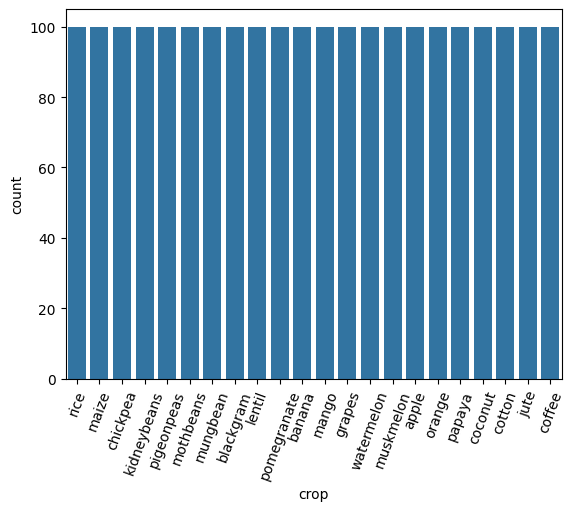

In [77]:
# Rotate each crop label
plt.xticks(rotation=70)

# Displaying distribution of each crop
sns.countplot(data=crops, x='crop')
plt.show()


## Predicting the crop using each feature individually


In [78]:
# loop over each predictor

for feature in ['N', 'K', 'P', 'ph']:
    log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    print(f"F1-score for {feature} is {f1_score(y_test, y_pred, average='weighted')}")
    

F1-score for N is 0.09174288231124259
F1-score for K is 0.21253183960611194
F1-score for P is 0.16735781755473228
F1-score for ph is 0.0336049904404621


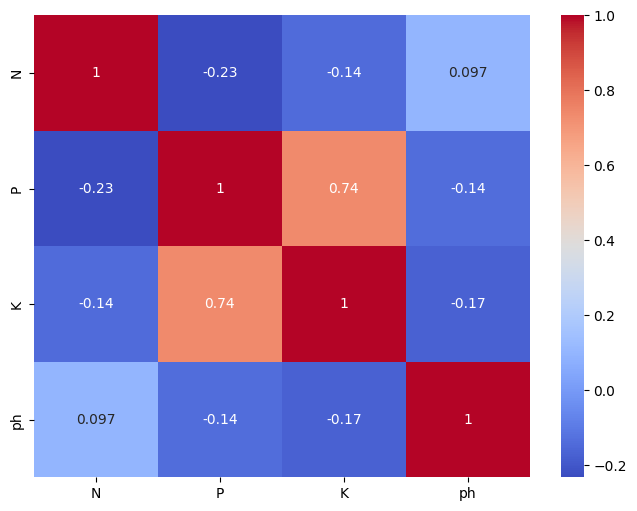

In [79]:
# Display correlation between crops
plt.figure(figsize=(8, 6))
sns.heatmap(crops.corr(), annot=True, cmap='coolwarm')
plt.show()

In [80]:
# Find the final features

final_features = ['K', 'N', 'ph']
X_train, X_test, y_train, y_test = train_test_split(X[final_features], y, test_size=0.2, random_state=10)
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average='weighted')

print(model_performance)

0.553876800428431
